In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve

2023-12-12 23:47:30,930 [24984] WARNING  py.warnings:109: [JupyterRequire] C:\Users\psank\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 6)

In [4]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

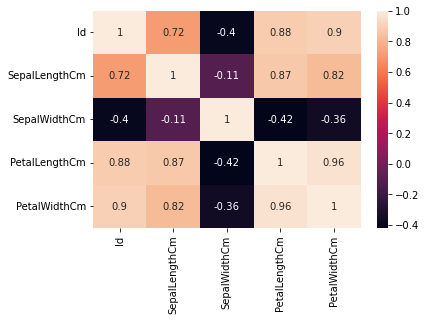

In [8]:
sns.heatmap(df.corr(), annot=True)

In [9]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
df['Species'].replace({'Iris-setosa': 0,
                       'Iris-versicolor': 1,
                      'Iris-virginica': 2}, inplace=True)

In [13]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [14]:
X=df.drop('Species', axis=1)
Y=df['Species']

In [15]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [17]:
x_train, x_test, y_train, y_test =train_test_split(X, Y, test_size=0.25, random_state=101)

In [18]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
94,95,5.6,2.7,4.2,1.3
135,136,7.7,3.0,6.1,2.3
21,22,5.1,3.7,1.5,0.4
22,23,4.6,3.6,1.0,0.2
29,30,4.7,3.2,1.6,0.2
...,...,...,...,...,...
63,64,6.1,2.9,4.7,1.4
70,71,5.9,3.2,4.8,1.8
81,82,5.5,2.4,3.7,1.0
11,12,4.8,3.4,1.6,0.2


In [19]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
33,34,5.5,4.2,1.4,0.2
16,17,5.4,3.9,1.3,0.4
43,44,5.0,3.5,1.6,0.6
129,130,7.2,3.0,5.8,1.6
50,51,7.0,3.2,4.7,1.4
123,124,6.3,2.7,4.9,1.8
68,69,6.2,2.2,4.5,1.5
53,54,5.5,2.3,4.0,1.3
146,147,6.3,2.5,5.0,1.9
1,2,4.9,3.0,1.4,0.2


In [20]:
model=LogisticRegression(multi_class='ovr')

In [21]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [22]:
y_pred_test=model.predict(x_test)

In [23]:
accuracy_score(y_pred_test, y_test)

1.0

In [24]:
confusion_matrix(y_pred_test, y_test)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]], dtype=int64)

In [25]:
classification_report(y_pred_test, y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00        17\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        38\n   macro avg       1.00      1.00      1.00        38\nweighted avg       1.00      1.00      1.00        38\n'

In [26]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<AxesSubplot:xlabel='SepalLengthCm'>

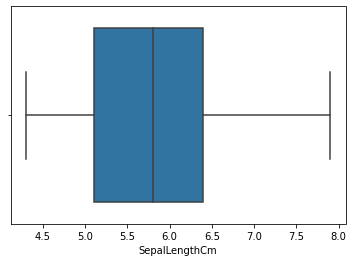

In [27]:
sns.boxplot(df['SepalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='count'>

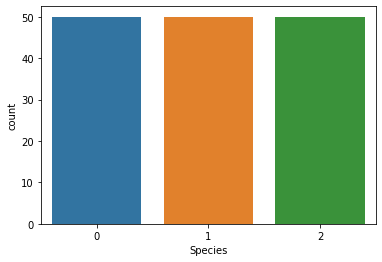

In [30]:
sns.countplot(df['Species'])